In [86]:
from keras.models import Sequential 
from keras.layers import Dense
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np

In [87]:
col_names = ['Loan ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self Employed', 'Applicant Income', 'Co-applicant Income', 'Loan Amount', 'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status']

loan_test = pd.read_csv("loan_test.csv", header=None, names=col_names)
loan_train = pd.read_csv("loan_train.csv", header=None, names=col_names)

In [88]:
loan_test=loan_test.drop(loan_test.index[0])

In [89]:
loan_train=loan_train.drop(loan_train.index[0])

In [90]:
loan_test.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Co-applicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
1,LP001008,Male,No,0,Graduate,No,6000,0,4.94875989,360,1,Urban,Y
2,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,5.587248658,360,1,Urban,Y
3,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,4.553876892,360,1,Urban,Y
4,LP001024,Male,Yes,2,Graduate,No,3200,700,4.248495242,360,1,Urban,Y
5,LP001028,Male,Yes,2,Graduate,No,3073,8106,5.298317367,360,1,Urban,Y


In [91]:
loan_train.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Co-applicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
1,LP001954,Female,Yes,1,Graduate,No,4666,0,4.905274778,360,1,Urban,Y
2,LP001401,Male,Yes,1,Graduate,No,14583,0,5.220355825,180,1,Rural,Y
3,LP002004,Male,No,0,Not Graduate,No,2927,2405,4.709530201,360,1,Semiurban,Y
4,LP002305,Female,No,0,Graduate,No,4547,0,4.744932128,360,1,Semiurban,Y
5,LP002314,Female,No,0,Not Graduate,No,2213,0,4.189654742,360,1,Rural,Y


In [92]:
#y = loan_test[0]
#X = loan_train(0, axis = 1)

In [93]:
#from sklearn.preprocessing import MinMaxScaler
#scalar = MinMaxScaler()
#scalar.fit(X_test)
#X_train = scalar.transform(X_train)

In [94]:
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)
loan_test['Education'].fillna(loan_test['Education'].mode()[0], inplace=True)
loan_test['Self Employed'].fillna(loan_test['Self Employed'].mode()[0], inplace=True)
loan_test['Property Area'].fillna(loan_test['Property Area'].mode()[0], inplace=True)


X_test = np.array(loan_test.iloc[:,1:-1])
y_test = loan_test['Loan Status']

In [95]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Education'].fillna(loan_train['Education'].mode()[0], inplace=True)
loan_train['Self Employed'].fillna(loan_train['Self Employed'].mode()[0], inplace=True)
loan_train['Property Area'].fillna(loan_train['Property Area'].mode()[0], inplace=True)


X_train = np.array(loan_train.iloc[:,1:-1])
y_train = loan_train['Loan Status']

In [96]:
X_train.shape

(491, 11)

In [97]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Label Encoder
labelencoder_X = LabelEncoder()

#Gender
X_train[:,0] = labelencoder_X.fit_transform(X_train[:,0])

#Marriage
X_train[:,1] = labelencoder_X.fit_transform(X_train[:,1])

#Education
X_train[:,3] = labelencoder_X.fit_transform(X_train[:,3])

#Self-Employed
X_train[:,4] = labelencoder_X.fit_transform(X_train[:,4])

#Property Value
X_train[:,-1] = labelencoder_X.fit_transform(X_train[:,-1])

#Variables
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_train = ct.fit_transform(X_train)

In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Label Encoder
labelencoder_X = LabelEncoder()

#Gender
X_test[:,0] = labelencoder_X.fit_transform(X_test[:,0])

#Marriage
X_test[:,1] = labelencoder_X.fit_transform(X_test[:,1])

#Education
X_test[:,3] = labelencoder_X.fit_transform(X_test[:,3])

#Self-Employed
X_test[:,4] = labelencoder_X.fit_transform(X_test[:,4])

#Property Value
X_test[:,-1] = labelencoder_X.fit_transform(X_test[:,-1])

#Variables
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_test = ct.fit_transform(X_test)

In [99]:
y_test = labelencoder_X.fit_transform(y_test)

In [100]:
y_train = labelencoder_X.fit_transform(y_train)

In [101]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.fit(X_train, y_train, epochs=300, batch_size=10)

- 0s 312us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 111/300
491/491 [==============================] - 0s 319us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 112/300
491/491 [==============================] - 0s 301us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 113/300
491/491 [==============================] - 0s 350us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 114/300
491/491 [==============================] - 0s 319us/step - loss: 0.6171 - accuracy: 0.6925
Epoch 115/300
491/491 [==============================] - 0s 308us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 116/300
491/491 [==============================] - 0s 309us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 117/300
491/491 [==============================] - 0s 313us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 118/300
491/491 [==============================] - 0s 297us/step - loss: 0.6172 - accuracy: 0.6925
Epoch 119/300
491/491 [==============================] - 0s 310us/step - loss: 0.6171 - accuracy: 0.6925
Epoch

In [105]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [106]:
model.evaluate(X_test, y_test)[1]

113/113 [==============================] - 0s 1ms/step


0.7876105904579163

In [107]:
model.history

Text(0, 0.5, 'accuracy')

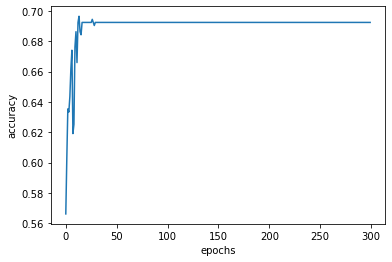

In [108]:
plt.plot(model.history.epoch, model.history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

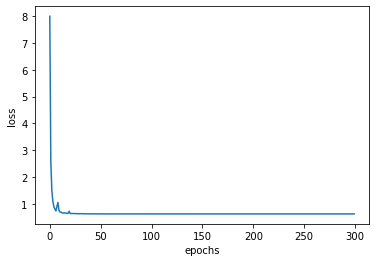

In [109]:
#plotting loss against no. of epochs
%matplotlib inline
plt.plot(model.history.epoch, model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [110]:
import scalar
Xnew = np.array(["LP001011", "Male", "Yes", 2, "Graduate", "Yes", 5417, 4196, 5.587248658, 360, 1, "Urban", "Y"])
Xnew = scalar.transform(Xnew)
ynew = model.predict_classes(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0],ynew[0]))

ModuleNotFoundError: No module named 'scalar'